In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [26]:
!pip install beautifulsoup4

In [27]:
from bs4 import BeautifulSoup
from string import punctuation

In [28]:
response=requests.get('http://shakespeare.mit.edu/winters_tale/full.html')

In [29]:
text=BeautifulSoup(response.text)

In [30]:
text=text.get_text()

In [31]:
def clean_text(text):
    text=text.split('\n')
    text=[t.strip() for t in text if t.strip()!='']
    text=[''.join([cleanedtext for cleanedtext in t if cleanedtext not in punctuation]) for t in text if text]
    text=[t.strip() for t in text]
    text=[t for t in text if len(t.split())>7]
    return text

In [32]:
text=clean_text(text)

In [33]:
tok=tf.keras.preprocessing.text.Tokenizer()

In [34]:
tok.fit_on_texts(text)

In [35]:
seq=tok.texts_to_sequences(text)

In [36]:
seq=tf.keras.preprocessing.sequence.pad_sequences(seq,maxlen=5)

In [37]:
max(tok.word_index.values())

2866

In [39]:
X,y=seq[:,:-1],seq[:,-1]

In [40]:
X.shape,y.shape

((1847, 4), (1847,))

In [41]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max(tok.word_index.values()),output_dim=5,input_length=4))
model.add(tf.keras.layers.LSTM(5))
model.add(tf.keras.layers.Dense(max(tok.word_index.values()),activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 5)              14330     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_1 (Dense)              (None, 2866)              17196     
Total params: 31,746
Trainable params: 31,746
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-2),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * 0.75
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [45]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                              factor=0.25, patience=3, min_lr=0.0001,verbose=1)

In [46]:
r=model.fit(X,y,epochs=50,callbacks=[callback])

Epoch 1/50
58/58 [==============================] - 2s 7ms/step - loss: 7.4733 - accuracy: 0.0130
Epoch 2/50
58/58 [==============================] - 0s 6ms/step - loss: 6.4414 - accuracy: 0.0189
Epoch 3/50
58/58 [==============================] - 0s 6ms/step - loss: 6.1028 - accuracy: 0.0292
Epoch 4/50
58/58 [==============================] - 0s 6ms/step - loss: 5.8388 - accuracy: 0.0309
Epoch 5/50
58/58 [==============================] - 0s 6ms/step - loss: 5.6022 - accuracy: 0.0325
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 5.3507 - accuracy: 0.0417
Epoch 7/50
58/58 [==============================] - 0s 6ms/step - loss: 5.1366 - accuracy: 0.0525
Epoch 8/50
58/58 [==============================] - 0s 6ms/step - loss: 4.9310 - accuracy: 0.0650
Epoch 9/50
58/58 [==============================] - 0s 6ms/step - loss: 4.7938 - accuracy: 0.0747
Epoch 10/50
58/58 [==============================] - 0s 6ms/step - loss: 4.6665 - accuracy: 0.0823
Epoch 11/50
58/58 [

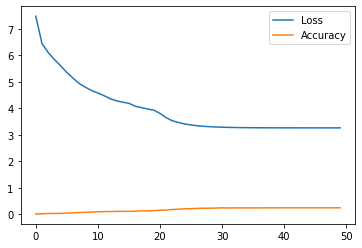

In [47]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [48]:
# Actual
list(zip(tok.sequences_to_texts(X[:10]),\
         tok.sequences_to_texts(y[:10].reshape(-1,1))))

[('camillo to visit bohemia', 'on'),
 ('my services are now', 'on'),
 ('as i have said', 'great'),
 ('summer the king of', 'sicilia'),
 ('which he justly owes', 'him'),
 ('shame us we will', 'be'),
 ('the freedom of my', 'knowledge'),
 ('such magnificencein so rarei', 'know'),
 ('will give you sleepy', 'drinks'),
 ('praise us as little', 'accuse')]

In [49]:
# Predicted
list(zip(tok.sequences_to_texts(X[:10]),\
         [tok.index_word[np.argmax(each)] for each in model.predict(X[:10])]))

[('camillo to visit bohemia', 'can'),
 ('my services are now', 'a'),
 ('as i have said', 'sir'),
 ('summer the king of', 'access'),
 ('which he justly owes', 'him'),
 ('shame us we will', 'it'),
 ('the freedom of my', 'lord'),
 ('such magnificencein so rarei', 'know'),
 ('will give you sleepy', 'kind'),
 ('praise us as little', 'life')]